In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import PIL.Image as im
%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
train_orig = pd.read_csv("train.csv")
test_orig = pd.read_csv("test.csv")

In [4]:
train = train_orig.iloc[:, 1:]
test = test_orig.copy()
Y = train_orig.iloc[:, 0]
Y = pd.get_dummies(Y).as_matrix()

In [5]:
train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
train = train.values.reshape(len(train_orig), 28, 28)
test = test.values.reshape(len(test_orig), 28, 28)

In [7]:
train.shape, Y.shape

((42000, 28, 28), (42000, 10))

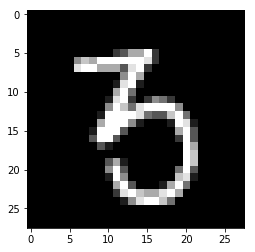

In [8]:
plt.imshow(train[90], cmap='gray')

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_dev, Y_train, Y_dev = train_test_split(train, Y, train_size=.9, test_size=0)
X_train = X_train.reshape(len(X_train), 28,28,1)
X_train = train.copy()
Y_train = Y.copy()

# Using Keras

In [10]:
import keras
from keras import layers

Using TensorFlow backend.


In [11]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Conv2D, Conv3D, MaxPool2D, MaxPool1D, MaxPool3D, AveragePooling2D


In [174]:
model = Sequential()

model.add(Conv2D(filters=6, kernel_size=5, strides=(1, 1), padding='valid',activation="relu",
                 input_shape=(28,28,1), name = "Conv1"))

model.add(MaxPool2D((2,2), 2, "valid"))


model.add(Conv2D(filters=6, kernel_size=5, strides=(1, 1), padding='valid',activation="relu", name = "conv2"))
model.add(MaxPool2D((2,2), 2, "valid"))

model.add(layers.Flatten())
model.add(Dense(units=64, name="fc1"))



model.add(Dense(units=10, activation='softmax', name = "output_layer"))

In [27]:
#AlexNet
#filter, kernelsize, strides, padding
#pool_size=(2, 2), strides=None, padding='valid'
#units, activation, use_bias=True, kernel_initializer='glorot_uniform',
model = Sequential()

model.add(Conv2D(filters= 28, kernel_size=6, strides=(4, 4), input_shape=(28,28,1,), activation="relu", padding="same"))
model.add(MaxPool2D((3,3), 2))

model.add(Conv2D(filters= 64, kernel_size=5, strides=(1,1), padding="same", activation="relu"))
model.add(MaxPool2D((3,3), 2))

model.add(Conv2D(filters= 128, kernel_size=3, strides=(1,1), padding="same", activation="relu"))

model.add(Conv2D(filters= 96, kernel_size=3, strides=(1,1), padding="same", activation="relu"))

model.add(layers.Flatten())
model.add(Dense(4096, activation="relu"))
model.add(Dense(1024, activation="relu"))
model.add(Dense(512, activation="relu"))

model.add(Dense(10, activation="sigmoid"))

In [28]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_39 (Conv2D)           (None, 7, 7, 28)          1036      
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 3, 3, 28)          0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 3, 3, 64)          44864     
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 1, 1, 64)          0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 1, 1, 128)         73856     
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 1, 1, 96)          110688    
_________________________________________________________________
flatten_2 (Flatten)          (None, 96)                0         
__________

In [29]:
model.compile(optimizer='Adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [48]:
X_train.shape, Y_train.shape

((42000, 28, 28), (42000, 10))

In [ ]:
model.fit(X_train.reshape(42000,28,28,1), Y_train, epochs=10, batch_size= 512)

Epoch 1/10


In [173]:
model.evaluate(X_dev.reshape(len(X_dev), 28,28,1), Y_dev, batch_size=28)

4200/4200 [==============================] - 1s 209us/step


[0.13759878559038044, 0.9650000023841858]

In [139]:
model.predict_classes(np.array([X_train[i]]))valid

array([5])

[0 0 0 0 0 1 0 0 0 0]


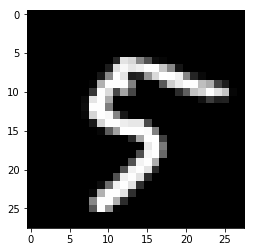

In [62]:
i = 2
print(Y_train[i])
plt.imshow(X_train[i][:, :,0], cmap = 'gray')

In [198]:
X_train = X_train.reshape(37800,28,28,1)
Y_train =  Y_train.reshape(37800, 10)

In [261]:
Y_train.shape

(10, 37800)

In [140]:
Y_test_pred = model.predict_classes(test.reshape(len(test), 28, 28, 1))

In [141]:
len(Y_test_pred)

28000

In [142]:
imageid = np.array([i for i in range(1, len(test)+1)])

In [143]:
df  = pd.DataFrame(Y_test_pred, columns=["Label"])
df.index = df.index+1

In [12]:
df.show()

NameError: name 'df' is not defined

In [151]:
df.to_csv('MNIST digit.csv', index_label='ImageId')

In [152]:
sample = pd.read_csv('sample_submission.csv')

In [153]:
sample.head()

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [154]:
pd.read_csv('MNIST digit.csv')

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
5,6,7
6,7,0
7,8,3
8,9,0
9,10,3


###### ishika

In [24]:
model = Sequential()

In [25]:
model.add(Dense(units=256, input_shape = (784,), activation="relu"))
model.add(Dense(units=64, activation="relu"))
model.add(Dense(units=10, activation="softmax"))

In [27]:
model.compile(optimizer='Adam', metrics=['accuracy'], loss='categorical_crossentropy')

In [31]:
model.fit(x=X_train.reshape(42000, 784), y = Y_train)

Epoch 1/1
42000/42000 [==============================] - 26s 624us/step - loss: 14.6632 - acc: 0.0902
